In [ ]:
from fbprophet import Prophet

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


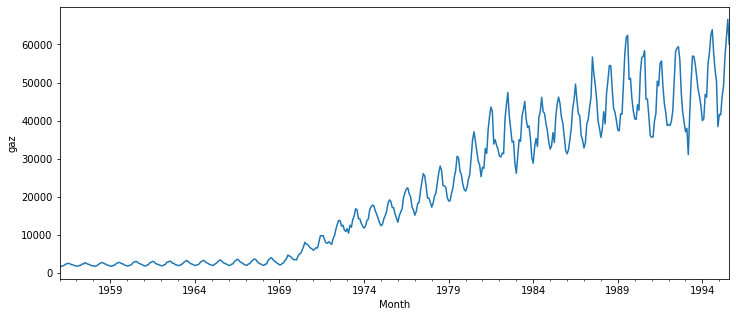

In [ ]:
gaz = pd.read_csv('18. monthly-production-of-gas-in-aus.csv', index_col=['Month'], parse_dates=['Month'], dayfirst=True)

gaz['Monthly'].plot(figsize=(12,5))
plt.ylabel('gaz')
plt.show()

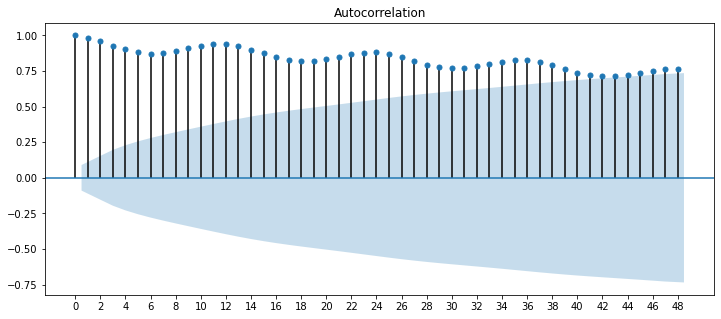

In [ ]:
plt.rcParams['figure.figsize'] = (12,5)
plot_acf(gaz['Monthly'].dropna(), lags=48)
plt.xticks(np.arange(0, 50, 2))
plt.show()

In [ ]:
gaz_prophet = gaz[['Monthly']]
gaz_prophet = gaz_prophet.reset_index()
gaz_prophet.columns = ['ds', 'y']

Далее куча моделей, где-то сезонность, где-то праздники, где-то сезонность мультипликативная. Она кстати оказалась хороша тут

In [ ]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False)
model.fit(gaz_prophet)

In [ ]:
future = model.make_future_dataframe(periods=36, freq='MS')
forecast = model.predict(future)

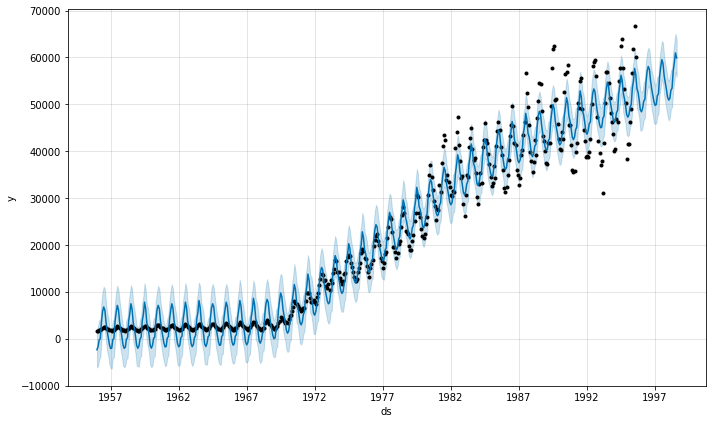

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False, yearly_seasonality=False)
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
model.fit(gaz_prophet)

In [ ]:
future = model.make_future_dataframe(periods=36, freq='MS')
forecast = model.predict(future)

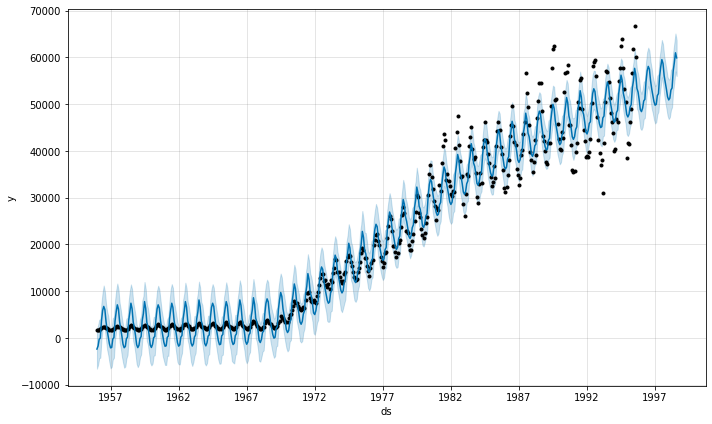

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
summer = pd.DataFrame({'holiday': 'Summer', 
                         'ds': pd.to_datetime([str(x)+'-07-01' for x in range(1956, 1995)]),
                         'lower_window': -7, 
                         'upper_window': 7
                        })

In [ ]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False, yearly_seasonality=False,  holidays=summer)
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
model.fit(gaz_prophet)

In [ ]:
future = model.make_future_dataframe(periods=36, freq='MS')
forecast = model.predict(future)

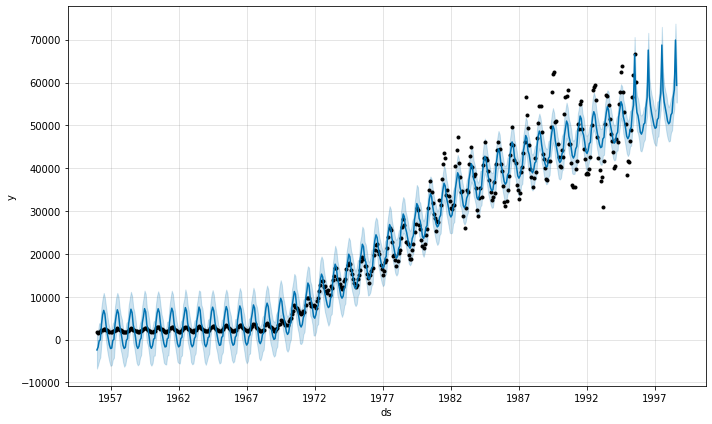

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False, yearly_seasonality=False,  holidays=summer)
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
model.add_country_holidays(country_name='AU')
model.fit(gaz_prophet)

In [ ]:
future = model.make_future_dataframe(periods=36, freq='MS')
forecast = model.predict(future)

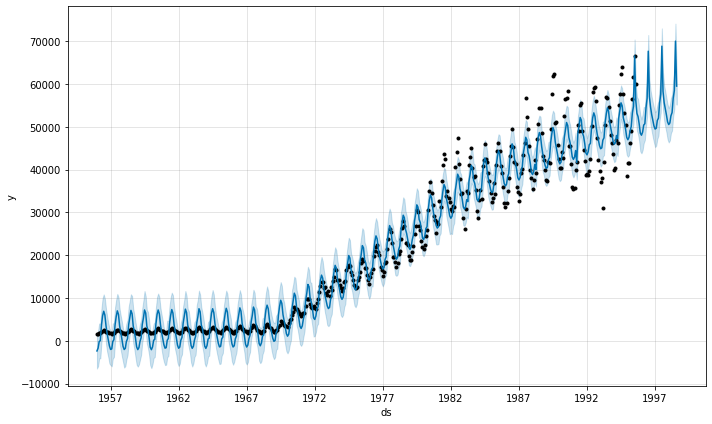

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False,  holidays=summer)
model.add_country_holidays(country_name='AU')
model.fit(gaz_prophet)

In [ ]:
future = model.make_future_dataframe(periods=36, freq='MS')
forecast = model.predict(future)

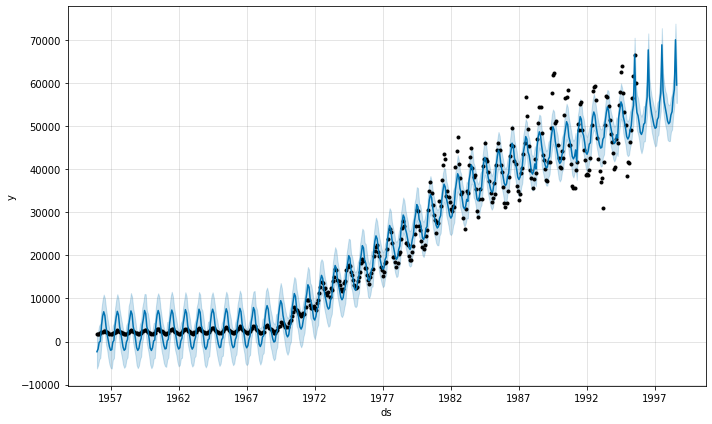

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False, yearly_seasonality=False,  holidays=summer, seasonality_mode='multiplicative')
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
model.fit(gaz_prophet)

In [ ]:
future = model.make_future_dataframe(periods=36, freq='MS')
forecast = model.predict(future)

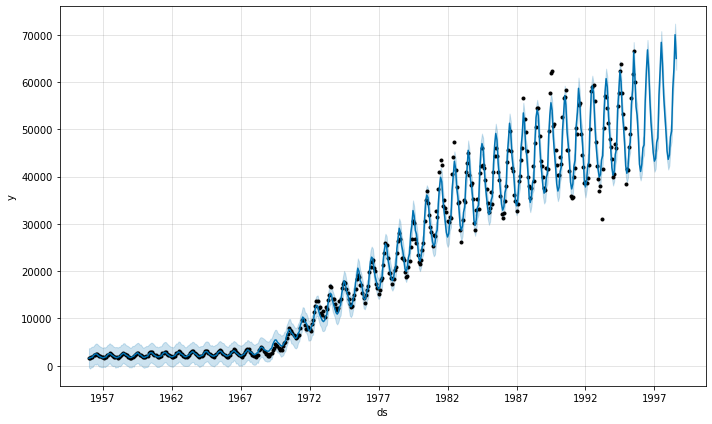

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False, yearly_seasonality=False, seasonality_mode='multiplicative')
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
# model.add_country_holidays(country_name='AU')
model.fit(gaz_prophet)

In [ ]:
future = model.make_future_dataframe(periods=36, freq='MS')
forecast = model.predict(future)

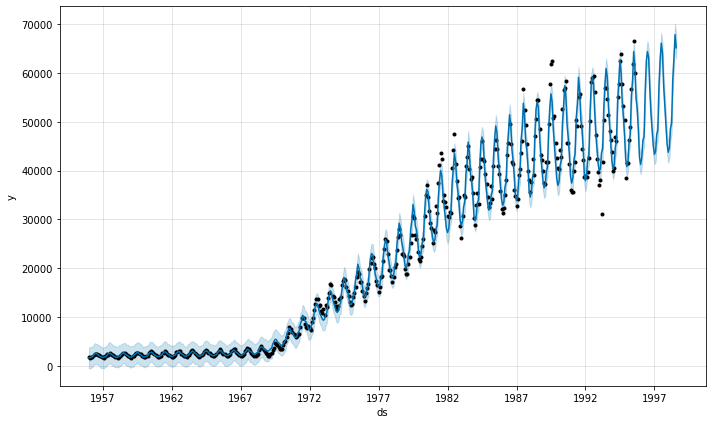

In [ ]:
model.plot(forecast)
plt.show()